In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols_needed = [
    'Severity',
    'Start_Time',
    'Weather_Condition',
    'Visibility(mi)',
    'Traffic_Signal'
]

df = pd.read_csv(
    "../cleaned_us_accidents.csv",
    usecols=cols_needed
)

print(df.head())

   Severity           Start_Time  Visibility(mi) Weather_Condition  \
0         3  2016-02-08 05:46:00            10.0        Light Rain   
1         2  2016-02-08 06:07:59            10.0        Light Rain   
2         2  2016-02-08 06:49:27            10.0          Overcast   
3         3  2016-02-08 07:23:34             9.0     Mostly Cloudy   
4         2  2016-02-08 07:39:07             6.0     Mostly Cloudy   

   Traffic_Signal  
0           False  
1           False  
2            True  
3           False  
4            True  


In [3]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()

In [4]:
df = df.dropna()

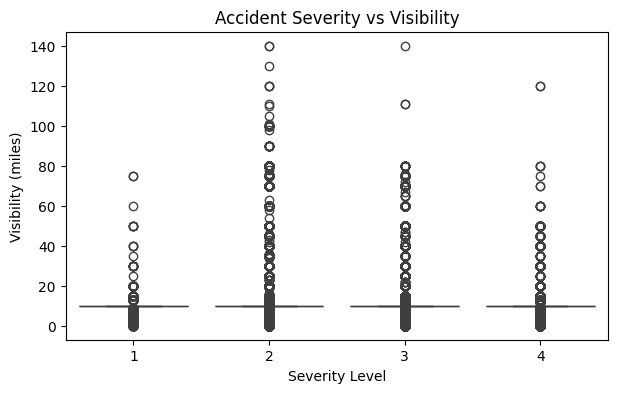

In [5]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Severity', y='Visibility(mi)', data=df)
plt.title("Accident Severity vs Visibility")
plt.xlabel("Severity Level")
plt.ylabel("Visibility (miles)")
plt.show()


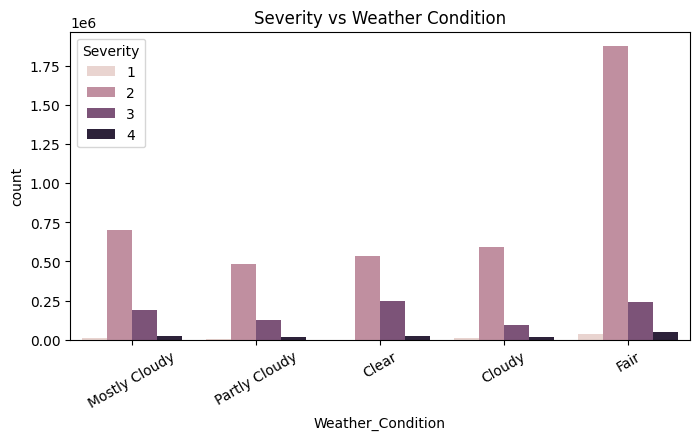

In [6]:
top_weather = df['Weather_Condition'].value_counts().head(5).index
df_weather = df[df['Weather_Condition'].isin(top_weather)]

plt.figure(figsize=(8,4))
sns.countplot(x='Weather_Condition', hue='Severity', data=df_weather)
plt.xticks(rotation=30)
plt.title("Severity vs Weather Condition")
plt.show()


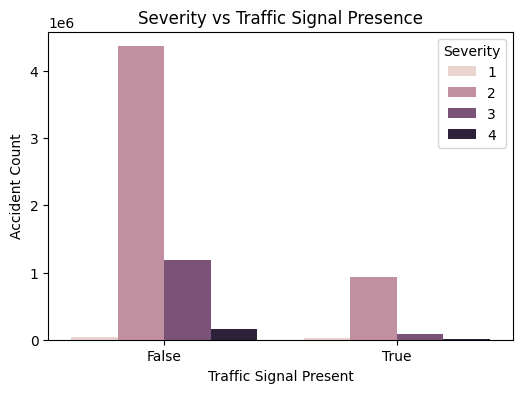

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='Traffic_Signal', hue='Severity', data=df)
plt.title("Severity vs Traffic Signal Presence")
plt.xlabel("Traffic Signal Present")
plt.ylabel("Accident Count")
plt.show()


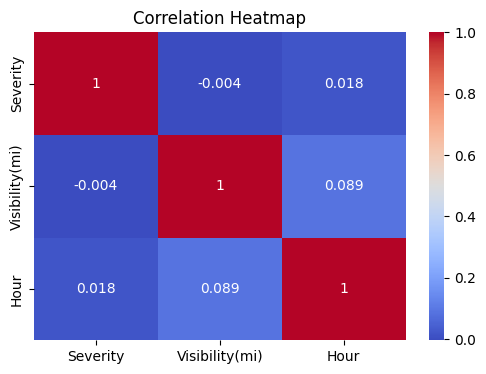

In [8]:
numeric_cols = df[['Severity', 'Visibility(mi)', 'Hour']]

plt.figure(figsize=(6,4))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


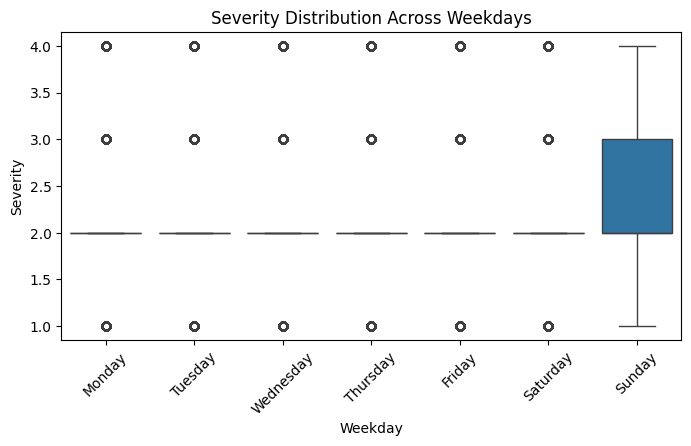

In [9]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Weekday', y='Severity', data=df,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xticks(rotation=45)
plt.title("Severity Distribution Across Weekdays")
plt.show()


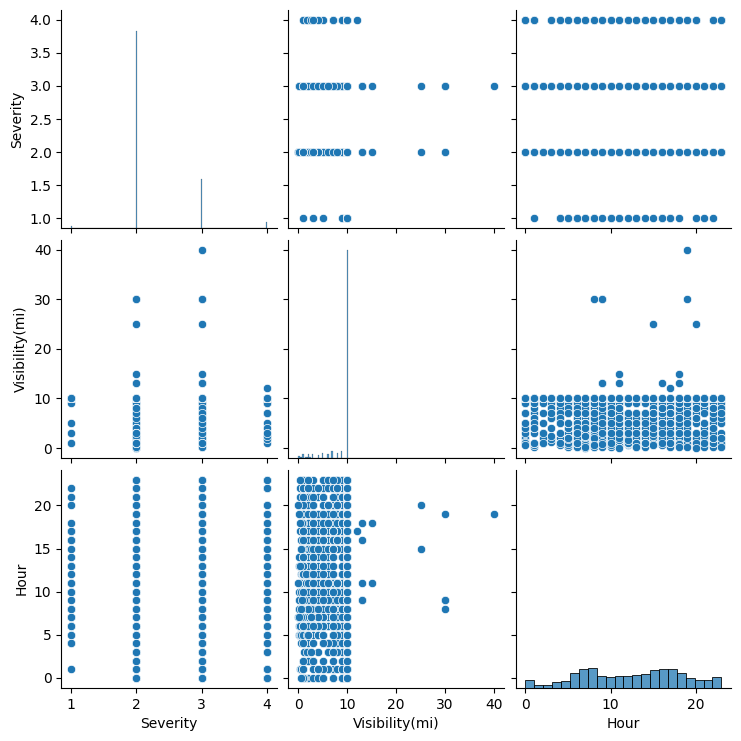

In [10]:
sample_df = df[['Severity', 'Visibility(mi)', 'Hour']].sample(5000, random_state=42)

sns.pairplot(sample_df)
plt.show()
